# Quantopian Research Basics
*This notebook can only be run on Quantopian Research* - https://www.quantopian.com/research

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
mcd = get_pricing(symbols='MCD', start_date='2005-01-01', end_date='2017-01-01', frequency='daily')

In [10]:
mcd.head(1)

,open_price,high,low,close_price,volume,price
2005-01-03 00:00:00+00:00,22.11,22.55,22.068,22.271,4324900.0,22.271


In [7]:
mcd.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3021 entries, 2005-01-03 to 2016-12-30
Freq: C
Data columns (total 6 columns):
open_price     3021 non-null float64
high           3021 non-null float64
low            3021 non-null float64
close_price    3021 non-null float64
volume         3021 non-null float64
price          3021 non-null float64
dtypes: float64(6)
memory usage: 165.2 KB


In [11]:
mcd_eq_info = symbols('MCD')
mcd_eq_info.to_dict()

{'asset_name': u'MCDONALDS CORP',
 'auto_close_date': Timestamp('2019-10-31 00:00:00+0000', tz='UTC'),
 'end_date': Timestamp('2019-10-28 00:00:00+0000', tz='UTC'),
 'exchange': u'NYSE',
 'exchange_full': u'NEW YORK STOCK EXCHANGE',
 'exchange_info': ExchangeInfo(u'NEW YORK STOCK EXCHANGE', u'NYSE', u'US'),
 'first_traded': None,
 'multiplier': 1.0,
 'sid': 4707,
 'start_date': Timestamp('2002-01-01 00:00:00+0000', tz='UTC'),
 'symbol': u'MCD',
 'tick_size': 0.01}

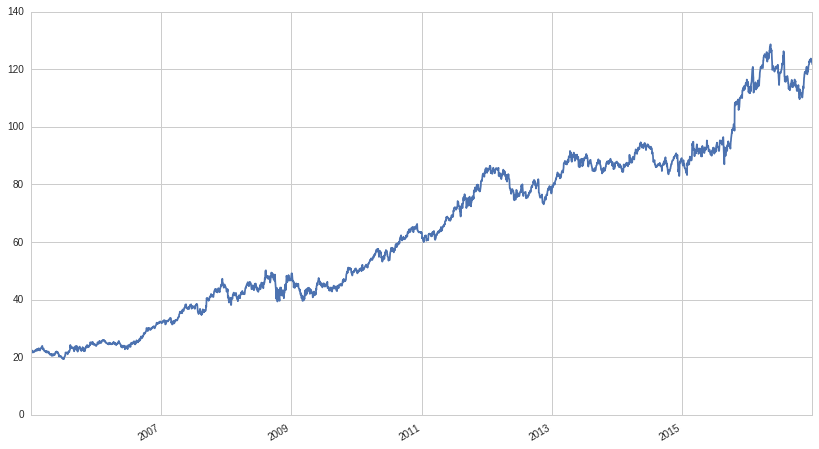

In [9]:
mcd['close_price'].plot();

## Pairs Trading Simple

In [2]:
united = get_pricing(symbols='UAL', start_date='2015-01-01', end_date='2017-01-01')
american = get_pricing(symbols='AAL', start_date='2015-01-01', end_date='2017-01-01')

High Correlation between 2 airlines stocks


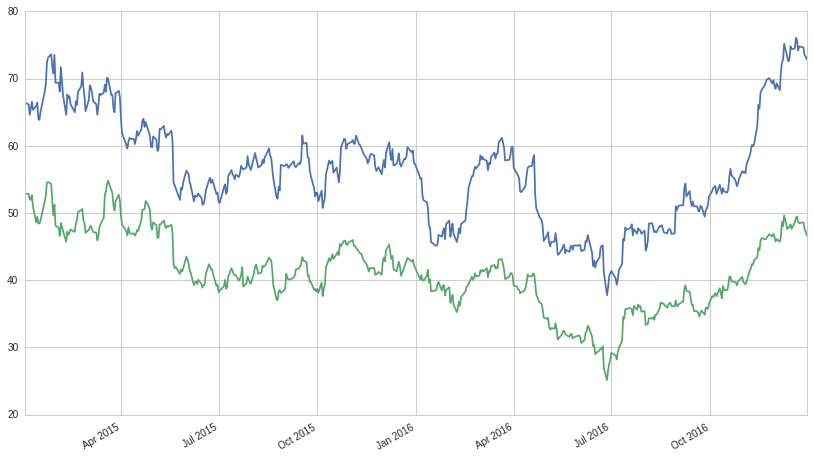

In [5]:
print('High Correlation between 2 airlines stocks')
united['close_price'].plot(label='United');
american['close_price'].plot(label='American');

In [7]:
np.corrcoef(american['close_price'], united['close_price'])

array([[ 1.        ,  0.92333958],
       [ 0.92333958,  1.        ]])

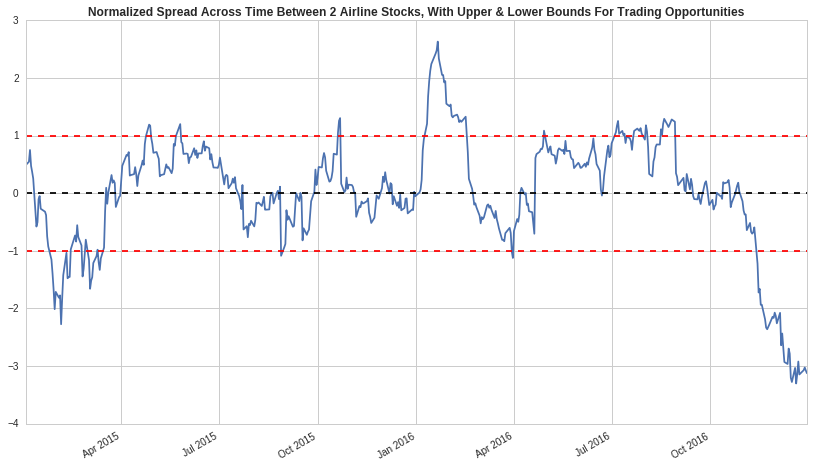

In [20]:
# Normalize spreads
def zscore(distribution):
    return (distribution - distribution.mean()) / distribution.std()

spread = american['close_price'] - united['close_price']
zscore(spread).plot(label='Norm Spread')
plt.axhline(zscore(spread).mean(), label='mean', c='black', linestyle='--')
plt.axhline(1, label='upper', c='r', linestyle='--')
plt.axhline(-1, label='lower', c='r', linestyle='--')
plt.title(
    'Normalized Spread Across Time Between 2 Airline Stocks, With Upper & Lower Bounds For Trading Opportunities',
    fontweight='bold'
);

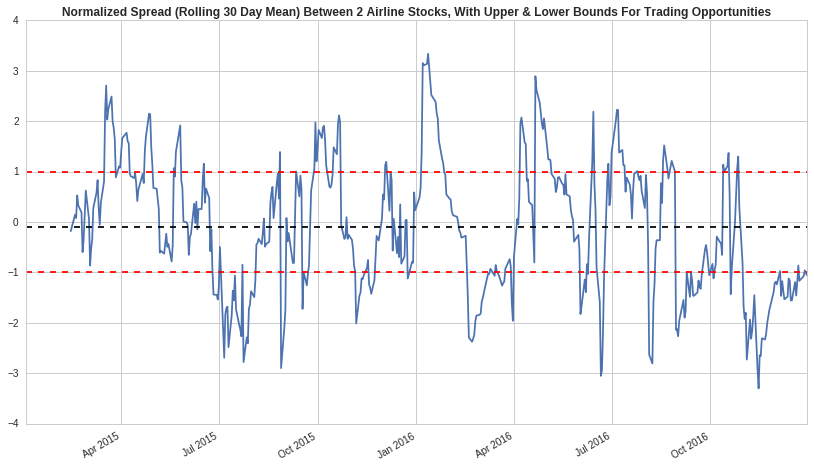

In [21]:
spread_ma1 = spread.rolling(1).mean()
spread_ma30 = spread.rolling(30).mean()
spread_std30 = spread.rolling(30).std()

spread_z = (spread_ma1 - spread_ma30) / (spread_std30)

spread_z.plot(label='Norm Spread Rolling 30 Day')
plt.axhline(spread_z.mean(), label='mean', c='black', linestyle='--')
plt.axhline(1, label='upper', c='r', linestyle='--')
plt.axhline(-1, label='lower', c='r', linestyle='--')
plt.title(
    'Normalized Spread (Rolling 30 Day Mean) Between 2 Airline Stocks, With Upper & Lower Bounds For Trading Opportunities',
    fontweight='bold'
);